In [26]:
from transformers import BertTokenizerFast, BertConfig
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Bert based tokenizer

In [27]:
model_name = 'bert-base-uncased'
config = BertConfig.from_pretrained(model_name)
dataset = pd.read_csv("../Experiments/1. SingleLabel/dataset.csv")

tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path=model_name, config=config)
token_lens = []
for text in tqdm(dataset["abstract"]):
    tokens = tokenizer.encode(text, max_length=512)
    token_lens.append(len(tokens))

100%|██████████| 139357/139357 [01:02<00:00, 2213.46it/s]


[]

<Figure size 432x288 with 0 Axes>

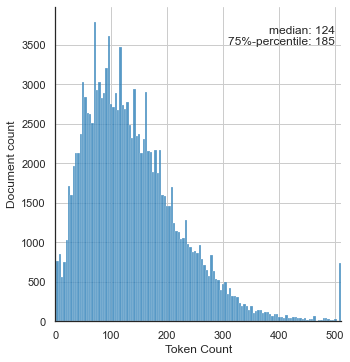

In [25]:
# plot it
sns.set(palette="tab10", style="white", font_scale=1)
fig = plt.figure()
sns.displot(token_lens)
plt.xlim([0, 512])
plt.xlabel('Token Count')
plt.ylabel("Document count")
plt.grid()
textstr = '\n'.join((
    f"median: {int(np.median(token_lens))}",
    f"75%-percentile: {int(np.percentile(token_lens, 75))}"
))
plt.text(500, 3500, textstr, ha='right')
plt.savefig("bert_base_token_count.png", dpi=150, transparent=True)
plt.plot()

In [28]:
text = dataset["abstract"][0]
print(text)
enc_text = tokenizer.encode(text, max_length=10)
print(enc_text)
dec_text = tokenizer.convert_ids_to_tokens(enc_text)
print(dec_text)


Disclosed is an oral dosage form comprising (i) an opioid agonists in releasable form and (ii) a sequestered opioid antagonist which is substantially not released when the dosage form is administered intact, such that the ratio of the amount of antagonist released from said dosage form after tampering to the amount of said antagonist released from said intact dosage form is about 4:1 or greater, based on the in-vitro dissolution at 1 hour of said dosage form in 900ml of Simulated Gastric Fluid using a USP Type II (paddle) apparatus at 75 rpm at 37 degrees C wherein said agonist and antagonist are interdispersed and are not isolated from each other in two distinct layers.
[101, 21362, 2003, 2019, 8700, 9998, 4270, 2433, 9605, 102]
['[CLS]', 'disclosed', 'is', 'an', 'oral', 'dos', '##age', 'form', 'comprising', '[SEP]']
